In [1]:
using Revise
using Pkg

ENV["PYTHON"] = Sys.which("python")
ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")
Pkg.build("PyCall")
using FileIO
using JLD2
include("../src/DistributionallyRobust.jl")
using .DistributionallyRobust

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/e32a90da027ca45d84678b826fffd3110bb3fc90/build.log`


    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/62f417f6ad727987c755549e9cd88c46578da562/build.log`


┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/kh-ryu/DRC_Project/DRC_Trajectron/Manifest.toml:0


┌ Info: Number of Julia Thread(s): 1
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:39
┌ Info: CUDA Device: NVIDIA GeForce RTX 3060
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:40


┌ Info: Python executable used by PyCall: /home/kh-ryu/anaconda3/envs/trajectron++/bin/python
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:41


In [16]:
include("$(@__DIR__)/../scripts/default_params/params_drc_data_trajectron.jl");

include("$(@__DIR__)/../scripts/parameter_setup_drc.jl");

In [17]:
scene_loader, controller, w_init, measurement_schedule, target_speed =
    controller_setup(scene_param,
                    predictor_param,
                    prediction_device=prediction_device,
                    cost_param=cost_param,
                    cnt_param=cnt_param,
                    dtc=dtc,
                    ego_pos_init_vec=ego_pos_init_vec,
                    ego_pos_goal_vec=ego_pos_goal_vec,
                    sim_horizon=sim_horizon,
                    verbose=true);

Scene Mode: data
Prediction Mode: trajectron
Deterministic Prediction: false
Loaded evaluation data from /home/kh-ryu/DRC_Project/DRC_Trajectron/Trajectron-plus-plus/experiments/processed/eth_test.pkl
Looking at the eth_test.pkl sequence, data_id 0, start_idx 905


Loaded Trajectron model from /home/kh-ryu/DRC_Project/DRC_Trajectron/Trajectron-plus-plus/experiments/pedestrians/models/eth_attention_radius_3/model_registrar-100.pt


In [18]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec,
                  measurement_schedule);

┌ Warning: Time 0.40 [sec]: DRC computation took 0.127 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:190


┌ Warning: Time 1.20 [sec]: DRC computation took 0.104 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:190


┌ Warning: Time 1.60 [sec]: DRC computation took 0.106 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:190


┌ Warning: Time 3.20 [sec]: DRC computation took 0.101 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:190


┌ Warning: Time 4.00 [sec]: DRC computation took 0.108 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:190


┌ Warning: Time 4.40 [sec]: DRC computation took 0.109 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:190


┌ Warning: Time 5.20 [sec]: DRC computation took 0.118 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:190


┌ Warning: Time 5.60 [sec]: DRC computation took 0.121 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:190


┌ Warning: Time 6.00 [sec]: DRC computation took 0.102 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:190


┌ Warning: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:241
┌ Warning: Time 6.80 [sec]: DRC computation took 0.101 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:190


TaskFailedException: TaskFailedException

    nested task error: MethodError: Cannot `convert` an object of type Vector{Float64} to an object of type Float64
    Closest candidates are:
      convert(::Type{T}, !Matched::Base.TwicePrecision) where T<:Number at twiceprecision.jl:273
      convert(::Type{T}, !Matched::AbstractChar) where T<:Number at char.jl:185
      convert(::Type{T}, !Matched::CartesianIndex{1}) where T<:Number at multidimensional.jl:130
      ...
    Stacktrace:
      [1] setindex!(A::Vector{Float64}, x::Vector{Float64}, i1::Int64)
        @ Base ./array.jl:966
      [2] _unsafe_copyto!(dest::Vector{Float64}, doffs::Int64, src::Vector{Vector{Float64}}, soffs::Int64, n::Int64)
        @ Base ./array.jl:253
      [3] unsafe_copyto!
        @ ./array.jl:307 [inlined]
      [4] _copyto_impl!
        @ ./array.jl:331 [inlined]
      [5] copyto!
        @ ./array.jl:317 [inlined]
      [6] copyto!
        @ ./array.jl:343 [inlined]
      [7] copyto_axcheck!
        @ ./abstractarray.jl:1127 [inlined]
      [8] Array
        @ ./array.jl:626 [inlined]
      [9] convert
        @ ./array.jl:617 [inlined]
     [10] convert
        @ ./some.jl:36 [inlined]
     [11] setproperty!
        @ ./Base.jl:39 [inlined]
     [12] macro expansion
        @ ~/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:171 [inlined]
     [13] (::Main.DistributionallyRobust.var"#31#32"{DRCController, WorldState})()
        @ Main.DistributionallyRobust ./task.jl:134

In [19]:
display_log(result.log)

Time 0.00 [sec]: New prediction is available to the controller.
Time 0.00 [sec]: New Distributionally Robust control is scheduled.
Time 0.00 [sec]: New measurement is obtained.
Time 0.00 [sec]: New prediction is scheduled.
Time 0.00 [sec]: New prediction is available to the controller.
Time 0.00 [sec]: New Distributionally Robust control is available to the controller
Time 0.00 [sec]: control: [0.008861014870384182, 1.2846636023503963] is applied to the system.
Time 0.40 [sec]: New measurement is obtained.
Time 0.40 [sec]: New prediction is scheduled.
Time 0.40 [sec]: New prediction is available to the controller.
Time 0.40 [sec]: New Distributionally Robust control is scheduled.
Time 0.40 [sec]: New Distributionally Robust control is available to the controller
Time 0.40 [sec]: control: [0.014159173647350929, 1.3040877508729698] is applied to the system.
Time 0.80 [sec]: New measurement is obtained.
Time 0.80 [sec]: New prediction is scheduled.
Time 0.80 [sec]: New prediction is avail

In [20]:
result.total_cnt_cost

0.48246662880791646

In [21]:
result.total_pos_cost

122.46736473000054

In [22]:
result.total_col_cost

57.26373321845901

In [23]:
result.total_col

0

In [24]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

180.21356457726745

In [25]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

0.5805002918113251

Progress:   8%|███▏                                     |  ETA: 0:00:11

Progress:  12%|████▊                                    |  ETA: 0:00:12

Progress:  15%|██████▎                                  |  ETA: 0:00:11

Progress:  19%|███████▉                                 |  ETA: 0:00:11

Progress:  23%|█████████▌                               |  ETA: 0:00:11

Progress:  27%|███████████                              |  ETA: 0:00:10

Progress:  31%|████████████▋                            |  ETA: 0:00:09

Progress:  35%|██████████████▎                          |  ETA: 0:00:09

Progress:  38%|███████████████▊                         |  ETA: 0:00:09

Progress:  42%|█████████████████▍                       |  ETA: 0:00:08

Progress:  46%|██████████████████▉                      |  ETA: 0:00:08

Progress:  50%|████████████████████▌                    |  ETA: 0:00:08

Progress:  54%|██████████████████████▏                  |  ETA: 0:00:07

Progress:  58%|███████████████████████▋                 |  ETA: 0:00:07

Progress:  62%|█████████████████████████▎               |  ETA: 0:00:06

Progress:  65%|██████████████████████████▊              |  ETA: 0:00:05

Progress:  69%|████████████████████████████▍            |  ETA: 0:00:05

Progress:  73%|██████████████████████████████           |  ETA: 0:00:04

Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:04

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:03

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:02

Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:02

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:01

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:00:14


┌ Info: Saved animation to 
│   fn = /home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/2_1_data_trajectron.gif
└ @ Plots /home/kh-ryu/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/2_1_data_trajectron.gif")
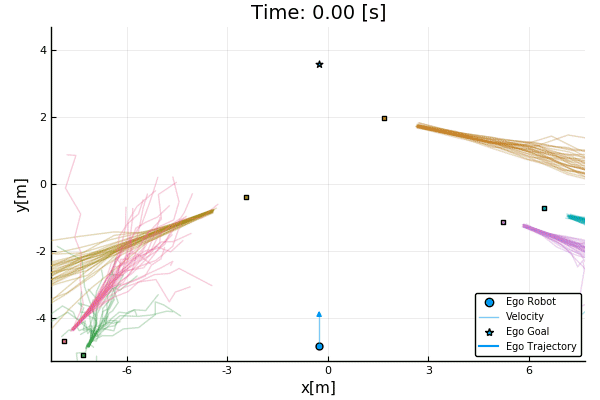

In [28]:
make_gif(result, 0.4, 1, (600, 400), 
            7, :bottomright,
            (-3. + -5.263534, 13. + -5.314636), (0. + -5.263534, 10. + -5.314636), 
            5., "2_1_data_trajectron.gif")

In [29]:
save("2_1_data_trajectron.jld2", "result", result)

Error encountered while save File{DataFormat{:JLD2}, String}("2_1_data_trajectron.jld2").

Fatal error:


CapturedException: type DataType has no field mutable
Stacktrace:
  [1] getproperty
    @ ./Base.jl:33 [inlined]
  [2] hasfielddata(T::Any, encounteredtypes::Vector{DataType})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:24
  [3] hasdata(T::DataType, encounteredtypes::Vector{DataType})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:32
  [4] hasdata
    @ ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:30 [inlined]
  [5] odr(#unused#::Type{Main.DistributionallyRobust.DRCEvaluationResult})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:563
  [6] objodr
    @ ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:109 [inlined]
  [7] write_dataset
    @ ~/.julia/packages/JLD2/qncOK/src/datasets.jl:541 [inlined]
  [8] write(g::JLD2.Group{JLD2.JLDFile{JLD2.MmapIO}}, name::String, obj::Main.DistributionallyRobust.DRCEvaluationResult, wsession::JLD2.JLDWriteSession{Dict{UInt64, JLD2.RelOffset}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/groups.jl:119
  [9] write(f::JLD2.JLDFile{JLD2.MmapIO}, name::String, obj::Main.DistributionallyRobust.DRCEvaluationResult, wsession::JLD2.JLDWriteSession{Dict{UInt64, JLD2.RelOffset}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/JLD2.jl:347
 [10] (::JLD2.var"#62#63"{String, Main.DistributionallyRobust.DRCEvaluationResult, Tuple{}})(file::JLD2.JLDFile{JLD2.MmapIO})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:23
 [11] jldopen(::JLD2.var"#62#63"{String, Main.DistributionallyRobust.DRCEvaluationResult, Tuple{}}, ::String, ::Vararg{String}; kws::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/loadsave.jl:4
 [12] jldopen(::Function, ::String, ::String)
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/loadsave.jl:1
 [13] save(::File{DataFormat{:JLD2}, String}, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:21
 [14] save(::File{DataFormat{:JLD2}, String}, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult)
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:17
 [15] invokelatest(::Any, ::Any, ::Vararg{Any}; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ Base ./essentials.jl:729
 [16] invokelatest(::Any, ::Any, ::Vararg{Any})
    @ Base ./essentials.jl:726
 [17] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Formatted, ::String, ::Vararg{Any}; options::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:219
 [18] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Formatted, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult)
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:196
 [19] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Symbol, ::String, ::String, ::Vararg{Any}; options::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:185
 [20] action
    @ ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:185 [inlined]
 [21] #save#20
    @ ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:129 [inlined]
 [22] save(::String, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult)
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:125
 [23] top-level scope
    @ ~/DRC_Project/DRC_Trajectron/notebook/Eval_Example_9_DRC_Data_Trajectron.ipynb:1